# Digit Classification with KNN and Naive Bayes

In this project, I will be implementing an image recognition system for classifying digits. Will be utilizing python sklearn classification models to detect hand written digit images.

The data is loaded from the digit data from https://www.openml.org/d/554. The digits have been size-normalized and centered in a fixed-size image. I will be implementing the pattern recognition methods on the data with minimal pre-processing.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.22.2.post1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data
X, Y = fetch_openml(name='mnist_784', version=1, return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


A 10x10 grid that visualizes 10 examples of each digit in the dataset.


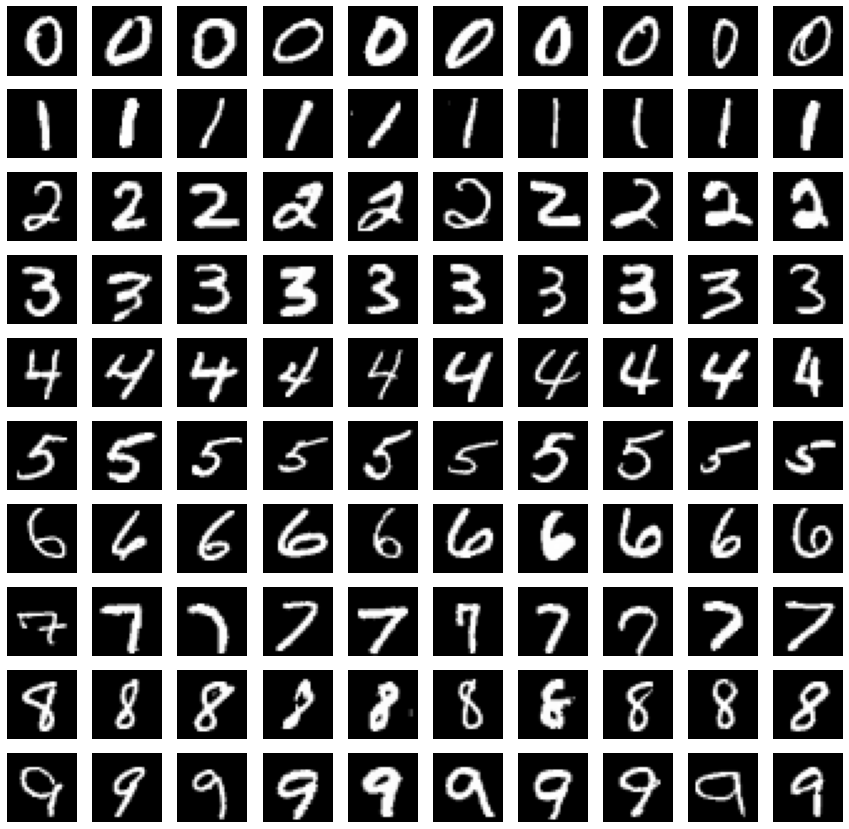

In [4]:
def P1(num_examples=10):

# Initialize a plot 10 by the number of examples
  plt.rc('image', cmap='gray')
  fig, ax = plt.subplots(10, num_examples, figsize=(1.5*num_examples, 15))

  digits = list(range(10))
  # Loop through the digits and add to the grid
  for i in digits:
    n = 0
    ind = 0
    while n < num_examples:
      if int(Y[ind]) == i:
        ax[i,n].imshow(X[ind].reshape(28,28))
        ax[i,n].axis('off')
        n += 1
      ind += 1

P1(10)

A k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluating the accuracy of each model.


In [5]:
def P2(k_values):


  for k in k_values:
    # Fit on mini train data and test with dev data.
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(mini_train_data, mini_train_labels)
    dev_predicted_labels = model.predict(dev_data)

    correct = sum(dev_labels == dev_predicted_labels)
    print("k={}: | percentage accuracy = {:.3}%".format(k , correct/len(dev_labels) * 100))

    if k == 1:
      print(classification_report(dev_labels, dev_predicted_labels))

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k=1: | percentage accuracy = 88.4%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k=3: | percentage accuracy = 87.6%
k=5: | percentage accuracy = 88.2%
k=7: | percentage accuracy = 87.7%
k=9: | percentage accuracy = 87.5%


For the 1-Nearest Neighbor model looking at the precision scores of the different labels [0-9] the digits 8 and 9 appear to be difficult to predict with a 1-NN model. We will be cautious about this as we work through the data

With 1-Nearest Neighbor models using training data of various sizes to evaluate and show the performance of each model.  Additionally, showing the time needed to measure the performance of each model.

In [6]:
def P3(train_sizes, accuracies):

  # Fit on mini train data and test with dev data 
  for t in train_sizes:
    subset_train_data, subset_train_labels = train_data[:t], train_labels[:t]

    # Fit on subsetted train data and test with dev data and start timer
    start = time.time()
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(subset_train_data, subset_train_labels)
    dev_predicted_labels = model.predict(dev_data)

    # Append the caluclated accuracies and print text for accuracy and time taken
    accuracies.append(sum(dev_labels == dev_predicted_labels)/len(dev_labels) * 100)
    stop = time.time()
    print("For training dataset of size {}: accuracy = {:.4}% and time taken = {:.6} secs".format(t, accuracies[-1], (stop-start)))


    


train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

For training dataset of size 100: accuracy = 70.2% and time taken = 0.182447 secs
For training dataset of size 200: accuracy = 79.1% and time taken = 0.337818 secs
For training dataset of size 400: accuracy = 81.1% and time taken = 0.696643 secs
For training dataset of size 800: accuracy = 86.6% and time taken = 1.33682 secs
For training dataset of size 1600: accuracy = 90.5% and time taken = 2.66836 secs
For training dataset of size 3200: accuracy = 92.7% and time taken = 5.54201 secs
For training dataset of size 6400: accuracy = 93.9% and time taken = 11.2327 secs
For training dataset of size 12800: accuracy = 95.2% and time taken = 22.8641 secs
For training dataset of size 25600: accuracy = 96.3% and time taken = 46.7092 secs


Showing a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Applying a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  
Predictor feature transform: Log transformation.
Outcome transform: odds(y)=y/(100-y)

BASE MODEL:
For training set size 60000 the predicted accuracy is 123.62 %
For training set size 120000 the predicted accuracy is 163.74 %
For training set size 1000000 the predicted accuracy is 752.25 %
Base model R^2 value is 0.4177


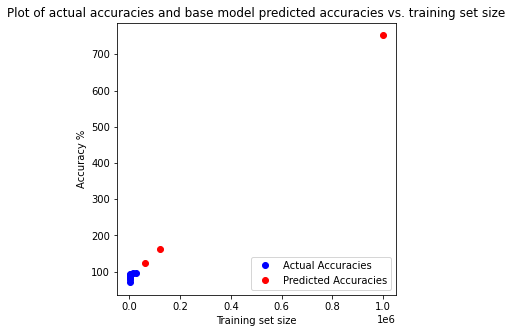


TRANSFORMED VARIABLES MODEL:
For training set size 60000 the predicted accuracy is 96.31 %
For training set size 120000 the predicted accuracy is 96.66 %
For training set size 1000000 the predicted accuracy is 97.41 %
Transformed variable model R^2 value is 0.9395


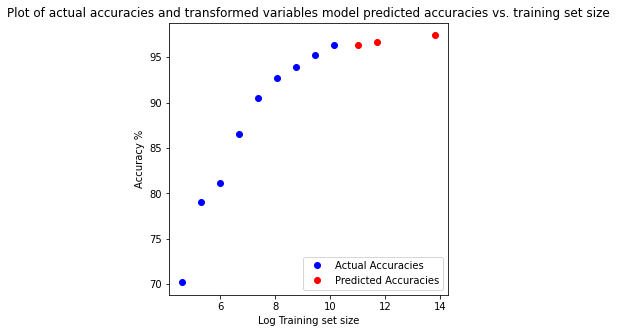

In [7]:
def P4():


  # resize input and output to numpy arrays
  np_train_sizes = np.array(train_sizes).reshape(-1, 1)
  np_accuracies = np.array(accuracies)
  predict_train_sizes = np.array([60000, 120000, 1000000]).reshape(-1, 1)

  # Train a base linear model and visualize
  base_lr_model = LinearRegression()
  base_lr_model.fit(np_train_sizes, np_accuracies)

  predicted_base_model_values = base_lr_model.predict(predict_train_sizes)
  print('BASE MODEL:')

  for i, j in zip(predict_train_sizes, predicted_base_model_values):
    print("For training set size %d the predicted accuracy is %.2f %%" % (i,j))

  print("Base model R^2 value is %.4f" % base_lr_model.score(np_train_sizes, np_accuracies))

  plt.figure(figsize=(5,5))
  plt.plot(np_train_sizes, np_accuracies, 'bo', label='Actual Accuracies')
  plt.plot(predict_train_sizes, predicted_base_model_values, 'ro', label='Predicted Accuracies')
  plot_X = np.concatenate((np_train_sizes,predict_train_sizes))
  plt.xlabel('Training set size')
  plt.ylabel('Accuracy %')
  plt.legend(loc='lower right')
  plt.title('Plot of actual accuracies and base model predicted accuracies vs. training set size')
  plt.show()


  # Train another linear model with transformed variables and visualize
  transformed_train_sizes = np.log(np_train_sizes)
  transformed_predict_train_sizes = np.log(predict_train_sizes)
  transformed_accuracies = np_accuracies / (100 - np_accuracies)

  lr_model = LinearRegression()
  lr_model.fit(transformed_train_sizes, transformed_accuracies)

  predicted_model_values = lr_model.predict(transformed_predict_train_sizes)
  inverse_predicted_model_values = 100/ (1 + 1/predicted_model_values)
  print('\nTRANSFORMED VARIABLES MODEL:')

  for i, j in zip(predict_train_sizes, inverse_predicted_model_values):
    print("For training set size %d the predicted accuracy is %.2f %%" % (i,j))

  print("Transformed variable model R^2 value is %.4f" % lr_model.score(transformed_train_sizes, transformed_accuracies))

  plt.figure(figsize=(5,5))
  plt.plot(transformed_train_sizes, np_accuracies, 'bo', label='Actual Accuracies')
  plt.plot(transformed_predict_train_sizes, inverse_predicted_model_values, 'ro', label='Predicted Accuracies')
  plot_X = np.concatenate((transformed_train_sizes,transformed_predict_train_sizes))
  plt.xlabel('Log Training set size')
  plt.ylabel('Accuracy %')
  plt.legend(loc='lower right')
  plt.title('Plot of actual accuracies and transformed variables model predicted accuracies vs. training set size')
  plt.show()



P4()

A 1-Nearest Neighbor model showing the confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

The most confused digit pair is 4 and 9


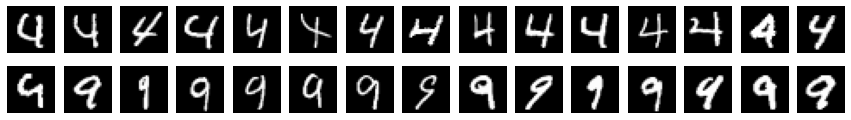

In [9]:
def P5():

  # Train 1 NN model
  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(mini_train_data, mini_train_labels)
  dev_predicted_labels = model.predict(dev_data)

  # Show the confusion matrix
  matrix = confusion_matrix(dev_labels, dev_predicted_labels)
  print(matrix)

  # To find the most confused pair
  for i in range(10):
      matrix[i, i] = -1
  # to flag if there are multiple pairs with the max value
  if np.count_nonzero(matrix == matrix.max()) == 1:
    max_digits = np.unravel_index(matrix.argmax(), matrix.shape)
    print('\nThe most confused digit pair is %d and %d' % max_digits)
  else:
    print('\nMax confusion value has more than 1 pair of digits')

  # plot images of the most confused pair
  plt.rc('image', cmap='gray')
  fig, ax = plt.subplots(2, 15, figsize=(15,2))

  # Loop through the digits and add to the grid
  for i, row in zip(max_digits, range(2)):
    n = 0
    ind = 0
    while n < 15:
      if int(dev_labels[ind]) == i:
        ax[row,n].imshow(dev_data[ind].reshape(28,28))
        ax[row,n].axis('off')
        n += 1
      ind += 1
      


P5()

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Below is a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

In [10]:
def P6():
    
  # helper funtion to blur the image
  def blur(data):
    blur_data = data.copy()
    blur_data = blur_data.reshape(28,28)
    filter = 1/16 * np.array([[1,2,1],[2,4,2],[1,2,1]])
    for i in range(28):
      for j in range(28):
        if i not in [0,27] and j not in [0,27]:
          val = np.sum(blur_data[i-1:i+2, j-1:j+2] * filter)
          blur_data[i,j] = val
    return blur_data.flatten()
  
  # Train 1-NN model with no filter 
  model1 = KNeighborsClassifier(n_neighbors=1)
  model1.fit(mini_train_data, mini_train_labels)
  dev_predicted_labels = model1.predict(dev_data)

  correct = sum(dev_labels == dev_predicted_labels)
  print("No filter on data: percentage accuracy = %.2f%%" % (correct/len(dev_labels) * 100))

  # Train 1-NN model filter the training data but not the dev data
  filtered_mini_train_data = np.array([blur(i) for i in mini_train_data])
  model2 = KNeighborsClassifier(n_neighbors=1)
  model2.fit(filtered_mini_train_data, mini_train_labels)
  dev_predicted_labels = model2.predict(dev_data)

  correct = sum(dev_labels == dev_predicted_labels)
  print("Filtered training data but not dev data: percentage accuracy = %.2f%%" % (correct/len(dev_labels) * 100))

  # Train 1-NN model filter the dev data but not the training data
  filtered_dev_data = np.array([blur(i) for i in dev_data])
  model3 = KNeighborsClassifier(n_neighbors=1)
  model3.fit(mini_train_data, mini_train_labels)
  dev_predicted_labels = model3.predict(filtered_dev_data)

  correct = sum(dev_labels == dev_predicted_labels)
  print("Filtered dev data but not training data: percentage accuracy = %.2f%%" % (correct/len(dev_labels) * 100))

  # Train 1-NN model filter both training data and dev data
  filtered_dev_data = np.array([blur(i) for i in dev_data])
  filtered_mini_train_data = np.array([blur(i) for i in mini_train_data])
  model4 = KNeighborsClassifier(n_neighbors=1)
  model4.fit(filtered_mini_train_data, mini_train_labels)
  dev_predicted_labels = model4.predict(filtered_dev_data)

  correct = sum(dev_labels == dev_predicted_labels)
  print("Filtered dev data and training data: percentage accuracy = %.2f%%" % (correct/len(dev_labels) * 100))


P6()

No filter on data: percentage accuracy = 88.40%
Filtered training data but not dev data: percentage accuracy = 89.70%
Filtered dev data but not training data: percentage accuracy = 86.80%
Filtered dev data and training data: percentage accuracy = 90.40%


As we can see applying the blurring filter on both the training and test data increases the accuracy of the kNN model.

Implementing two Naive Bayes models and evaluating their performances.  First model will use a `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1. The second model will use `MultinomialNB` and map pixel values to either 0, 1, or 2, representing white, gray, or black setting the white/gray/black separation thresholds to 0.1 and 0.9.

In [11]:
def P7():

  # Bernoulli model
  model_1 = BernoulliNB(binarize=0.1)
  model_1.fit(mini_train_data, mini_train_labels)
  print('Bernoulli model accuracy: %.4f' % model_1.score(dev_data, dev_labels))

  # MultinomialNB model
  def categorize(data):
    categorized_data = np.zeros(data.shape)
    # Apply a threshold  to each feature.
    categorized_data[data[:,:] >= 0.1] = 1
    categorized_data[data[:,:] >= 0.9] = 2
    return categorized_data

  categorized_mini_train_data = categorize(mini_train_data)
  categorized_dev_data = categorize(dev_data)
  model_2 = MultinomialNB()
  model_2.fit(categorized_mini_train_data, mini_train_labels)
  print('Multionomial model accuracy: %.4f' % model_2.score(categorized_dev_data, dev_labels))
  


P7()

Bernoulli model accuracy: 0.8140
Multionomial model accuracy: 0.8070


Searching across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.

In [12]:
def P8(alphas):

  model = BernoulliNB(binarize=0)
  
  gs_NB = GridSearchCV(model,
                      param_grid=alphas,
                      scoring='accuracy',
                      cv=5)
  gs_NB.fit(mini_train_data, mini_train_labels)
  return gs_NB


alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print('Mean Test Scores: ',nb.cv_results_['mean_test_score'])
print("Best alpha = ", nb.best_params_)

Mean Test Scores:  [0.814 0.819 0.825 0.822 0.818 0.813 0.809 0.805 0.783]
Best alpha =  {'alpha': 0.001}


Because Naive Bayes produces a generative model, it can be used to generate digit images.

Below is a Bernoulli Naive Bayes model that generates a 10x20 grid with 20 example images of each digit.

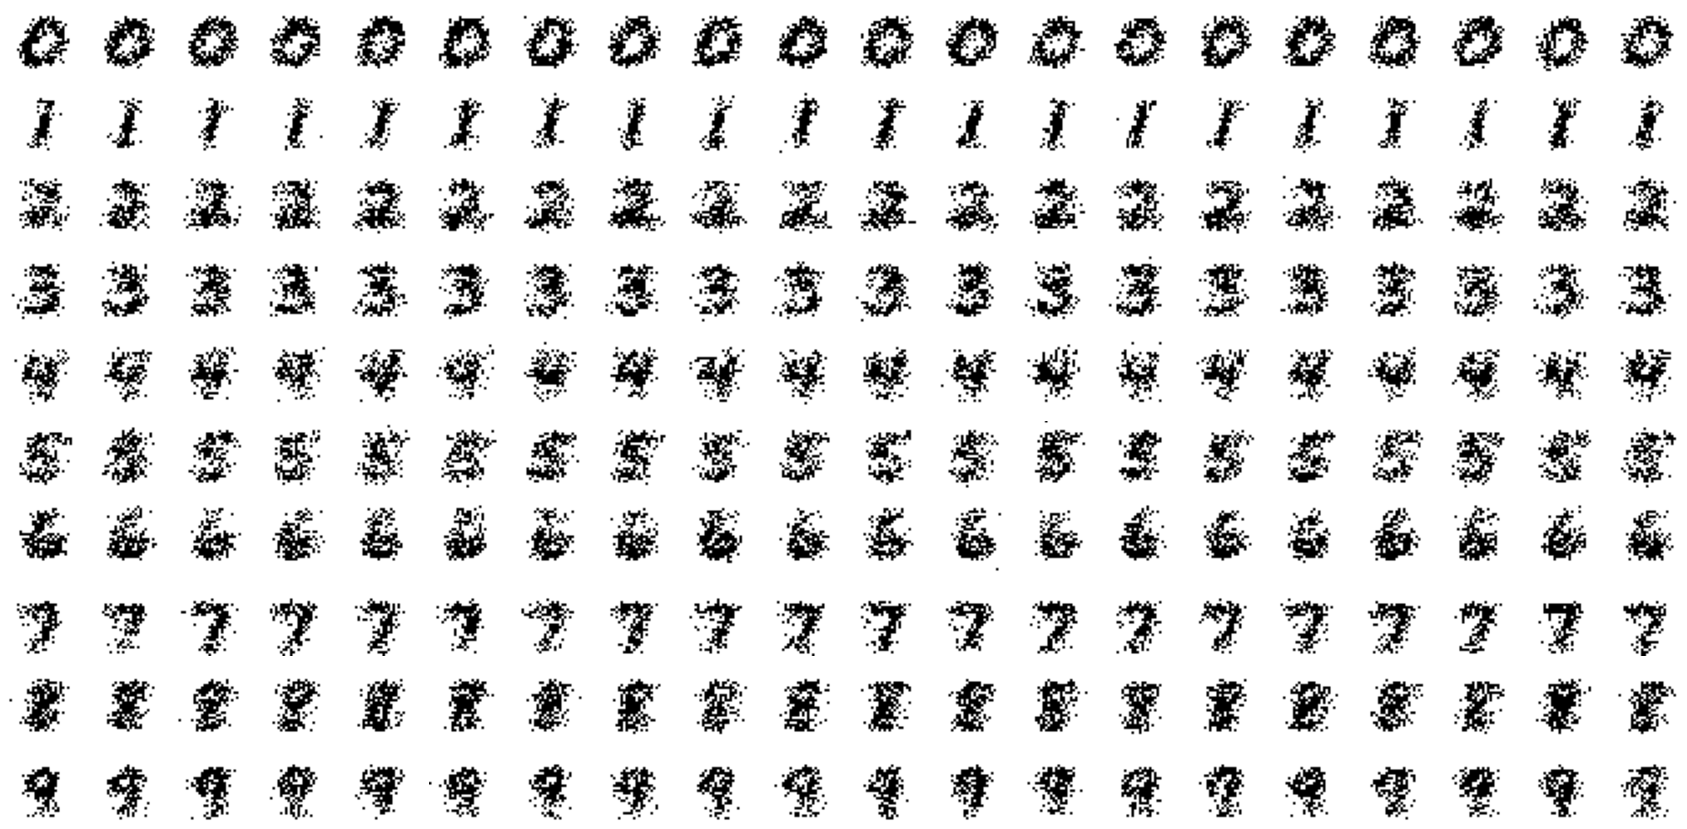

In [13]:
def P10(num_examples=20):

  # Train a BernoulliNB model.
  model = BernoulliNB()
  model.fit(train_data, train_labels)

  # Initialize a plot 10 by the number of examples
  plt.rc('image', cmap='gray')
  fig, ax = plt.subplots(10, num_examples, figsize=(1.5*num_examples, 15))

  digits = list(range(10))

  # Loop through the digits and add to the grid
  for i in digits:
    n = 0
    nums = np.exp(model.feature_log_prob_[i,:])
    while n < num_examples:
      random = np.random.rand(784,)
      random[random < nums] = 0
      random[random >= nums] = 1
      ax[i,n].imshow(random.reshape(28,28))
      ax[i,n].axis('off')
      n += 1
  

P10(20)